## Traffic simulation analysis

#### Traffic simulations with **cellular automata**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from Utils.data import load_data, average_dataframe


#### One lane traffic simulation
In this section, we analyze data from a one-lane road traffic simulation. 

In [2]:
METERS_PER_CELL = 5
data_dir = 'data'
fig_dir = os.path.join(data_dir, 'figures')

In [3]:
dataframes_one_lane = load_data(
    data_dir=os.path.join(data_dir, 'data_one_lane'),
    dtypes={'avg_speed': float, 'density': float, 'flux': float, 'lane_right': pd.StringDtype()}
)
dataframes_two_lanes = load_data(
    data_dir=os.path.join(data_dir, 'data_two_lane'),
    dtypes={'avg_speed': float, 'density': float, 'flux': float, 'lane_right': pd.StringDtype(), 'lane_left': pd.StringDtype()}
)

df_avg_one_lane = average_dataframe(dataframes_one_lane, ['avg_speed', 'density', 'flux'])
df_avg_two_lanes = average_dataframe(dataframes_two_lanes, ['avg_speed', 'density', 'flux'])

df = pd.DataFrame()
df['speed_1'] = df_avg_one_lane['avg_speed']
df['speed_2'] = df_avg_two_lanes['avg_speed']
df['density_1'] = df_avg_one_lane['density']
df['density_2'] = df_avg_two_lanes['density']
df['flux_1'] = df_avg_one_lane['flux']
df['flux_2'] = df_avg_two_lanes['flux']
df.describe()

,speed_1,speed_2,density_1,density_2,flux_1,flux_2
count,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000
mean,2.456715,4.008965,0.136862,0.090261,0.212778,0.250833
std,0.408030,0.199756,0.040088,0.021591,0.451915,0.488403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.180995,3.896004,0.119000,0.089000,0.000000,0.000000
50%,2.326392,4.007353,0.156500,0.097000,0.000000,0.000000
75%,2.722733,4.132075,0.162500,0.101500,0.000000,0.000000
max,5.000000,4.555555,0.177000,0.113000,3.000000,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   speed_1    3600 non-null   float64
 1   speed_2    3600 non-null   float64
 2   density_1  3600 non-null   float64
 3   density_2  3600 non-null   float64
 4   flux_1     3600 non-null   float64
 5   flux_2     3600 non-null   float64
dtypes: float64(6)
memory usage: 168.9 KB


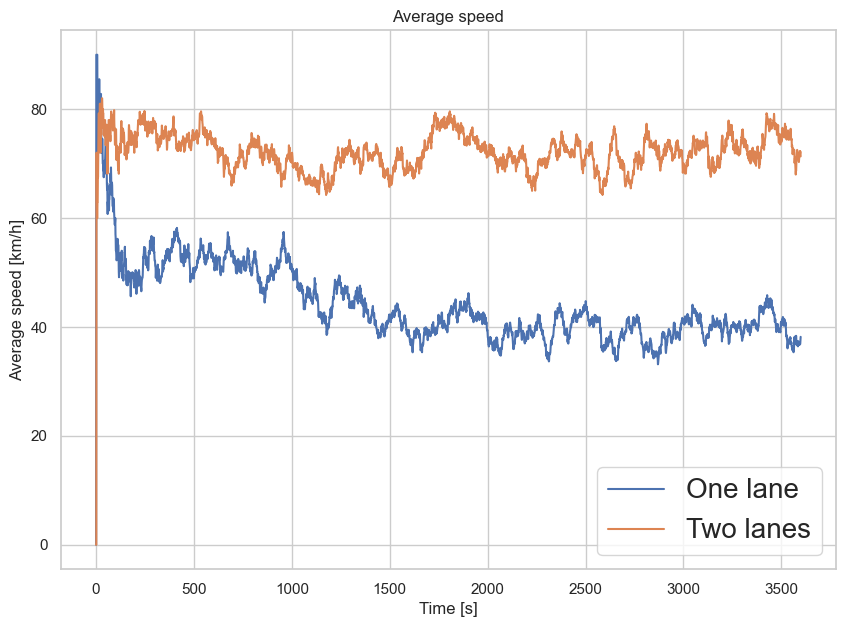

In [9]:
sns.set_theme(style='whitegrid', palette='deep', rc={'figure.figsize': (10, 7)})
ax = sns.lineplot(df['speed_1']*METERS_PER_CELL*3.6, label='One lane')
ax = sns.lineplot(df['speed_2']*METERS_PER_CELL*3.6, ax=ax, label='Two lanes')
ax.set(xlabel='Time [s]', ylabel='Average speed [km/h]')
ax.legend(loc='lower right', ncol=1, fontsize=20)
ax.set_title('Average speed')
plt.savefig(os.path.join(fig_dir, 'compare_avg_speed.png'))

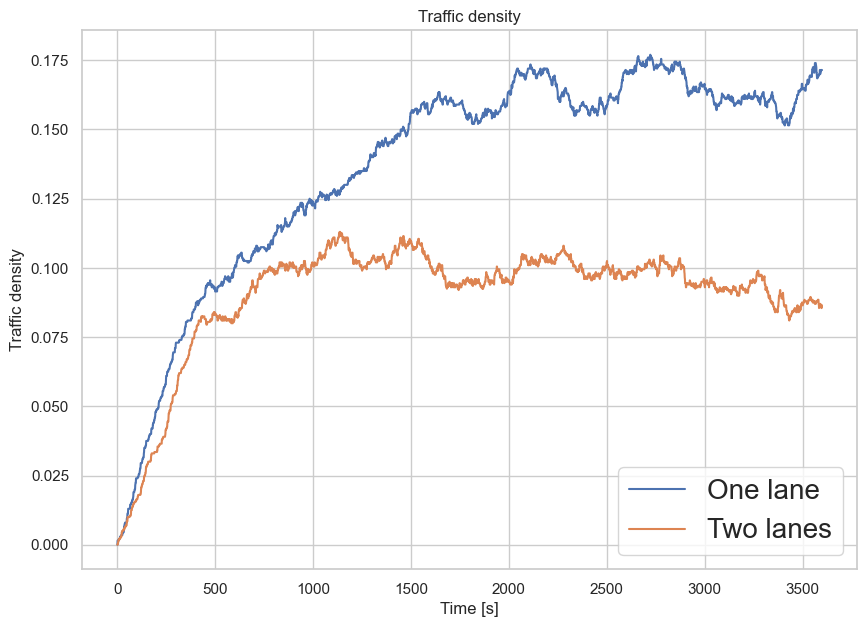

In [11]:
sns.set_theme(style='whitegrid', palette='deep', rc={'figure.figsize': (10, 7)})
ax = sns.lineplot(df['density_1'], label='One lane')
ax = sns.lineplot(df['density_2'], label='Two lanes', ax=ax)
ax.set(xlabel='Time [s]', ylabel='Traffic density')
ax.legend(loc='lower right', ncol=1, fontsize=20)
ax.set_title('Traffic density')
plt.savefig(os.path.join(fig_dir, 'compare_traffic_density.png'))

In [7]:
df.index.name = 'time_step'  # Set a name for the index for clarity
df = df.reset_index()

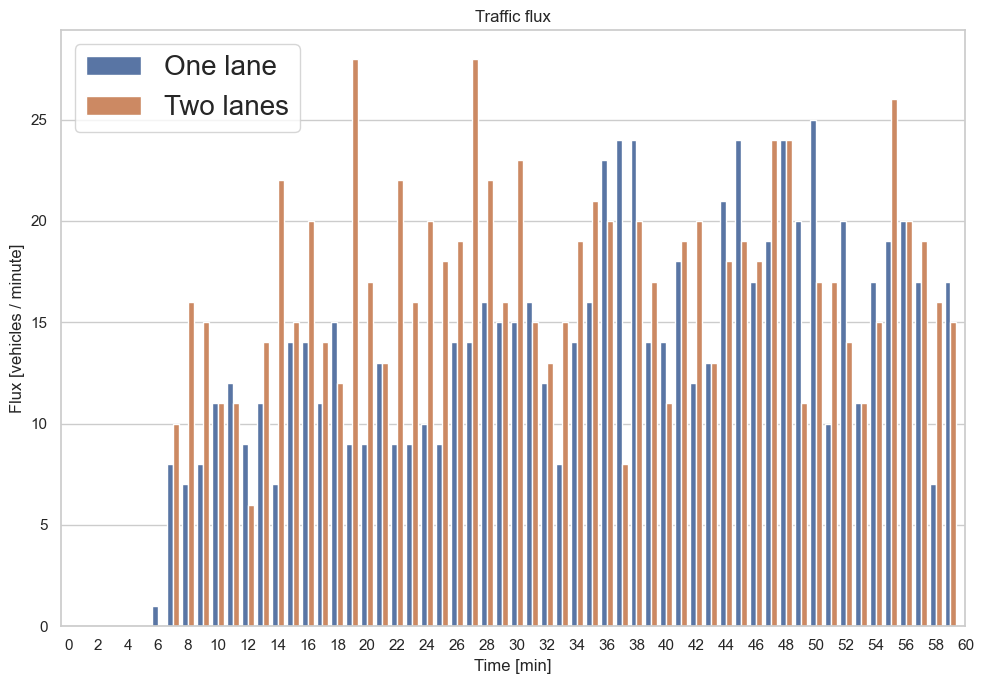

In [29]:

# Grouping data by every 60 time steps (example)
grouped = df.groupby(np.arange(len(df)) // 60).sum()
grouped = grouped.reset_index()
grouped.rename(columns={'flux_1': 'One lane', 'flux_2': 'Two lanes'}, inplace=True)
# Reshape the grouped DataFrame
grouped_long = grouped.melt(id_vars='time_step', value_vars=['One lane', 'Two lanes'],
                            var_name='Flux Type', value_name='Value')

# Bar plot
sns.set_theme(style='whitegrid', palette='deep', rc={'figure.figsize': (10, 7)})
sns.barplot(x='time_step', y='Value', hue='Flux Type', data=grouped_long)

plt.title('Traffic flux')
plt.xlabel('Time [min]')
plt.ylabel('Flux [vehicles / minute]')
legend_labels = ['One lane', 'Two lanes']
legend = plt.legend(fontsize=20)


# Setting custom x-ticks
tick_positions = np.arange(0, len(grouped) + 1, 2)  # positions for each group
tick_labels = [str(x) for x in tick_positions]  # labels as original time steps
plt.xticks(ticks=tick_positions, labels=tick_labels)

plt.tight_layout()  # Adjust layout for better fit
plt.savefig(os.path.join(fig_dir, 'compare_flux.png'))